<a href="https://colab.research.google.com/github/HanHsunShih/weblog-of-Thesis/blob/main/230919data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-38-9a1f2317ab0c>:60: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  transformed_image = transformed_image.resize((256, 256), Image.ANTIALIAS)


(256, 256)


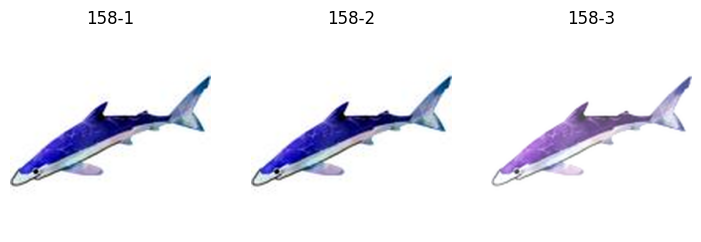

In [ ]:
#Colour Enhance

import albumentations as albu
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# define colour enhance
transform = albu.ColorJitter(brightness=0.2, contrast=0.3, saturation=0.3, hue=0.1) #p=機率

# preview the image
num_images = 3
num_rows = num_images // 4 #//=整數除法 e.g.7//3=2, 1//5=0
if num_images % 4 != 0:
    num_rows += 1

# set the input and output folder
resized_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Resized images"
output_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Colour enhance"

os.makedirs(output_folder, exist_ok=True)

#clean the output_folder
file_list = os.listdir(output_folder)

for file_name in file_list:
    file_path = os.path.join(output_folder, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

# create clour enhance file to output_folder
for index in os.listdir(resized_folder):
    # Extract index from the file name
    index_str = index.split('.')[0]
    number = int(index_str)

    # load the resize file
    resize_path = os.path.join(resized_folder, f'{index}')
    resize = Image.open(resize_path)

    # Get the original image size
    original_width, original_height = resize.size

    original_path = os.path.join(output_folder, f'{number}-0.jpg')
    resize.save(original_path)

    if number % 10 == 0:
        plt.subplot(num_rows, 5, i + 1)
        plt.title(f'{index}-{i+1}')
        plt.imshow(transformed_image)
        plt.axis('off')

    for i in range(num_images):
        # Colour enhance
        transformed_image = transform(image=np.array(resize))['image']

        # Convert back to PIL image with the original size
        transformed_image = Image.fromarray(np.uint8(transformed_image))
        transformed_image = transformed_image.resize((256, 256), Image.ANTIALIAS)

        colour_enhance_path = os.path.join(output_folder, f'{number}-{i+1}.jpg')
        transformed_image.save(colour_enhance_path, quality=95)

        plt.subplot(num_rows, 5, i + 2)
        plt.title(f'{number}-{i+1}')
        plt.imshow(transformed_image)
        plt.axis('off')

print(transformed_image.size)

In [ ]:
#Data Augmentation

import cv2
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

# 定義色彩增強的參數
datagen = ImageDataGenerator(
    rotation_range=40,  # 旋轉範圍
    width_shift_range=0.2,  # 寬度平移範圍
    height_shift_range=0.2,  # 高度平移範圍
    shear_range=0.2,  # 剪切強度
    zoom_range=0.2,  # 縮放範圍
    horizontal_flip=True,  # 水平翻轉
    fill_mode='constant',  # 填充模式設為'constant'
    cval=255  # 填充值為白色
)

# 資料夾路徑
input_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Colour enhance"
output_folder = "/content/drive/MyDrive/Thesis/fish_drawn_dataset/Data augmentation"

# 創建輸出資料夾
os.makedirs(output_folder, exist_ok=True)

#clean the output_folder
file_list = os.listdir(output_folder)

for file_name in file_list:
    file_path = os.path.join(output_folder, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

# 讀取資料夾中的檔案
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):  # 假設你的圖像是.jpg格式
        # 檔案路徑
        file_path = os.path.join(input_folder, filename)

        # 讀取原始圖像
        original_image = Image.open(file_path)

        # 儲存原始圖像
        original_name = os.path.splitext(filename)[0]
        original_output_path = os.path.join(output_folder, f'{original_name}-0.jpg')
        original_image.save(original_output_path)

        # 生成衍生圖像
        for i in range(1, 6):  # 衍生圖像的數量
            # 進行色彩增強
            transformed_image = datagen.random_transform(np.array(original_image))

            # 儲存衍生圖像
            derived_output_path = os.path.join(output_folder, f'{original_name}-{i}.jpg')
            Image.fromarray(transformed_image).save(derived_output_path)